In [71]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/HP/Desktop/100 Days Machine learning/Csv.files/train_Iris.csv')

In [29]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
107,17,5.4,3.9,1.3,0.4,Iris-setosa
6,125,6.7,3.3,5.7,2.1,Iris-virginica
45,134,6.3,2.8,5.1,1.5,Iris-virginica
111,74,6.1,2.8,4.7,1.2,Iris-versicolor
54,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# remove Id col
df = df.drop(columns='Id')


In [41]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.6,2.9,4.6,1.3,Iris-versicolor
1,6.2,2.9,4.3,1.3,Iris-versicolor
2,7.2,3.0,5.8,1.6,Iris-virginica
3,5.8,2.8,5.1,2.4,Iris-virginica
4,6.3,2.5,5.0,1.9,Iris-virginica


In [43]:
# Label encode Species
from sklearn.preprocessing import LabelEncoder


In [45]:
encoder = LabelEncoder()

In [49]:
df['Species'] = encoder.fit_transform(df['Species'])


In [51]:
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.6,2.9,4.6,1.3,1
1,6.2,2.9,4.3,1.3,1
2,7.2,3.0,5.8,1.6,2
3,5.8,2.8,5.1,2.4,2
4,6.3,2.5,5.0,1.9,2


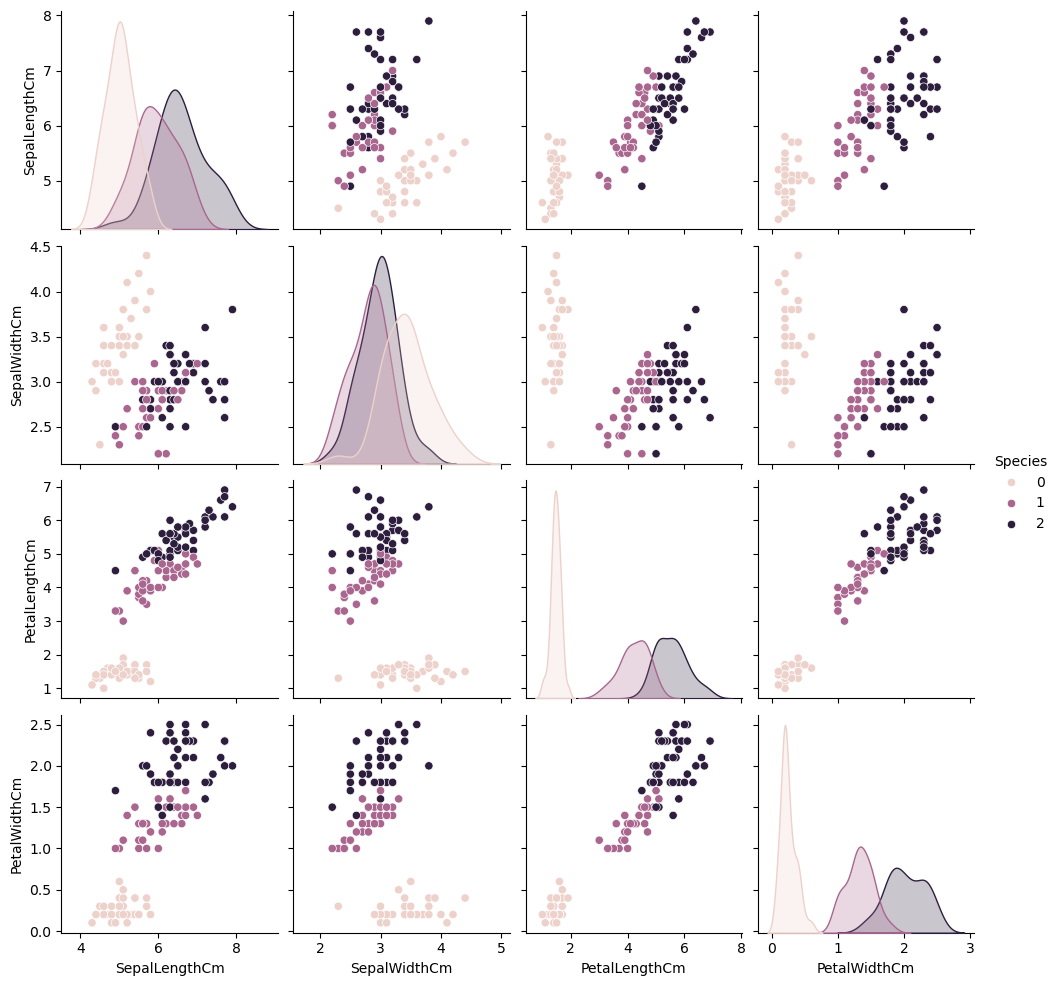

In [53]:
import seaborn as sns
sns.pairplot(df,hue='Species')


In [55]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]


In [57]:
new_df.head()


,SepalLengthCm,SepalWidthCm,Species
0,6.6,2.9,1
1,6.2,2.9,1
2,7.2,3.0,2
3,5.8,2.8,2
4,6.3,2.5,2


In [59]:
new_df.shape


(80, 3)

In [61]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [65]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [67]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]


In [73]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.79
rf 0.72
knn 0.74


In [75]:
from sklearn.ensemble import VotingClassifier


# Hard Voting


In [77]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.73


# Soft Voting

In [79]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


# Weighted Voting


In [84]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.76
for i=1,j=1,k=2 0.74
for i=1,j=1,k=3 0.73
for i=1,j=2,k=1 0.74
for i=1,j=2,k=2 0.75
for i=1,j=2,k=3 0.74
for i=1,j=3,k=1 0.73
for i=1,j=3,k=2 0.74
for i=1,j=3,k=3 0.74
for i=2,j=1,k=1 0.76
for i=2,j=1,k=2 0.77
for i=2,j=1,k=3 0.75
for i=2,j=2,k=1 0.74
for i=2,j=2,k=2 0.75
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.74
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.76
for i=3,j=1,k=1 0.77
for i=3,j=1,k=2 0.76
for i=3,j=1,k=3 0.76
for i=3,j=2,k=1 0.75
for i=3,j=2,k=2 0.75
for i=3,j=2,k=3 0.76
for i=3,j=3,k=1 0.74
for i=3,j=3,k=2 0.76
for i=3,j=3,k=3 0.77


# Classifiers of Same Algo


In [87]:
from sklearn.svm import SVC


In [89]:
# new dataset 
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [91]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
